In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#to display all rows columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
ipl_df = pd.read_csv('/content/drive/MyDrive/IPL_ball_by_ball_updated.csv')

In [3]:
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]

In [4]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)

In [5]:
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [6]:
ipl_df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [7]:
ipl_df[ipl_df.batting_team == 'Royal Challengers Bangalore'].total_runs.value_counts()

1    11679
0    9807 
4    3189 
2    1884 
6    1472 
3    95   
5    48   
7    13   
Name: total_runs, dtype: int64

In [8]:
# t1 - bat first, t2 - bat second
# Ex: MI vs RCB, (match_id: 1254058)

t1 = 'Mumbai Indians'
t2 = 'Kings XI Punjab'

In [9]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()

array([ 419146,  501237,  548334,  598037,  829775,  980941,  980985,
       1136610, 1175364, 1216503, 1216517])

In [10]:
required_match_id = 1216517

In [11]:
ipl_df[ipl_df.match_id == required_match_id].head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
187697,1216517,2020,2020-10-18,Dubai International Cricket Stadium,1,0.1,Mumbai Indians,Kings XI Punjab,RG Sharma,Q de Kock,GJ Maxwell,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [12]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [13]:
t1_outs,t2_outs

(1472, 1151)

In [14]:
t1_outcomes = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [15]:
t1_outcomes,t2_outcomes

(1    12107
 0    10598
 4    3468 
 2    1836 
 6    1540 
 3    106  
 5    57   
 7    10   
 Name: total_runs, dtype: int64,
 1    9338
 0    7858
 4    2672
 2    1563
 6    1070
 3    83  
 5    35  
 7    3   
 Name: total_runs, dtype: int64)

In [16]:
results = [0, 1, 2, 3, 4, 6, 'w']

In [17]:
t1_outcomes_count = []
t2_outcomes_count = []

for i in results:
  try:
    if i != 'w':
      t1_outcomes_count.append(t1_outcomes[i])
    else:
      t1_outcomes_count.append(t1_outs)
  except:
        t1_outcomes_count.append(0)

In [18]:
for i in results:
    try:
        if i != 'w':
            t2_outcomes_count.append(t2_outcomes[i])
        else:
            t2_outcomes_count.append(t2_outs)
    except:
        t2_outcomes_count.append(0)

In [19]:
t1_outcomes_count

[10598, 12107, 1836, 106, 3468, 1540, 1472]

In [20]:
t2_outcomes_count

[7858, 9338, 1563, 83, 2672, 1070, 1151]

In [21]:
t1_prob = [j/sum(t1_outcomes_count) for j in t1_outcomes_count]
t2_prob = [j/sum(t2_outcomes_count) for j in t2_outcomes_count]

In [22]:
t1_prob, t2_prob

([0.34047611398464356,
  0.3889549265910624,
  0.05898416166029492,
  0.0034054036688405563,
  0.11141452758055707,
  0.049474732547306194,
  0.04729013396729528],
 [0.33107225616178637,
  0.3934274278491679,
  0.06585211712660628,
  0.0034969454392247737,
  0.11257636401938066,
  0.045081103855066355,
  0.04849378554876764])

In [23]:
t1_cum_pb = list(np.cumsum(t1_prob))
t2_cum_pb = list(np.cumsum(t2_prob))

In [24]:
t1_cum_pb,t2_cum_pb

([0.34047611398464356,
  0.729431040575706,
  0.7884152022360009,
  0.7918206059048415,
  0.9032351334853985,
  0.9527098660327047,
  1.0],
 [0.33107225616178637,
  0.7244996840109543,
  0.7903518011375607,
  0.7938487465767854,
  0.906425110596166,
  0.9515062144512324,
  1.0])

In [25]:
pred_runs = 0
pred_wkts = 0
balls = 120

i1p0 = t1_cum_pb[0]
i1p1 = t1_cum_pb[1]
i1p2 = t1_cum_pb[2]
i1p3 = t1_cum_pb[3]
i1p4 = t1_cum_pb[4]
i1p6 = t1_cum_pb[5]
i1pw = t1_cum_pb[6]

i2p0 = t2_cum_pb[0]
i2p1 = t2_cum_pb[1]
i2p2 = t2_cum_pb[2]
i2p3 = t2_cum_pb[3]
i2p4 = t2_cum_pb[4]
i2p6 = t2_cum_pb[5]
i2pw = t2_cum_pb[6]

for i in range(balls):
  rnd = np.random.random()

  if rnd <= i1p0:
        pred_runs += 0
  elif rnd <= i1p1:
      pred_runs += 1
  elif rnd <= i1p2:
      pred_runs += 2
  elif rnd <= i1p3:
      pred_runs += 3
  elif rnd <= i1p4:
      pred_runs += 4
  elif rnd <= i1p6:
      pred_runs += 6
  else:
      pred_runs += 0
      pred_wkts += 1
      if pred_wkts == 10:
          break

In [26]:
pred_runs, pred_wkts

(150, 6)

In [27]:
def firstInnings(curruns,curwkts,curovers):
  pred_runs = curruns
  pred_wkts = curwkts
  balls = curovers

  overs = int(str(balls).split('.')[0])
  balls = int(str(balls).split('.')[1])
  if balls >= 6:
        balls = 6
  current_balls = overs*6 + balls
  leftballs = 120 - current_balls

  i1p0 = t1_cum_pb[0]
  i1p1 = t1_cum_pb[1]
  i1p2 = t1_cum_pb[2]
  i1p3 = t1_cum_pb[3]
  i1p4 = t1_cum_pb[4]
  i1p6 = t1_cum_pb[5]
  i1pw = 1

  for i in range(leftballs):
    rnd = np.random.random()

    if rnd <= i1p0:
      pred_runs += 0
    elif rnd <= i1p1:
      pred_runs += 1
    elif rnd <= i1p2:
      pred_runs += 2
    elif rnd <= i1p3:
      pred_runs += 3
    elif rnd <= i1p4:
      pred_runs += 4
    elif rnd <= i1p6:
      pred_runs += 6
    else:
      pred_runs += 0
      pred_wkts += 1
      if pred_wkts == 10:
          break

  return pred_runs

In [28]:
firstInnings(140,5,15.0)

183

In [29]:
def secondInnings(curruns,curwkts,curovers,target):
  pred_runs = curruns
  pred_wkts = curwkts
  balls = curovers

  overs = int(str(balls).split('.')[0])
  balls = int(str(balls).split('.')[1])
  if balls >= 6:
        balls = 6
  current_balls = overs*6 + balls
  leftballs = 120 - current_balls

  i2p0 = t2_cum_pb[0]
  i2p1 = t2_cum_pb[1]
  i2p2 = t2_cum_pb[2]
  i2p3 = t2_cum_pb[3]
  i2p4 = t2_cum_pb[4]
  i2p6 = t2_cum_pb[5]
  i2pw = 1

  for i in range(leftballs):
    rnd = np.random.random()

    if rnd <= i2p0:
      pred_runs += 0
    elif rnd <= i2p1:
      pred_runs += 1
    elif rnd <= i2p2:
      pred_runs += 2
    elif rnd <= i2p3:
      pred_runs += 3
    elif rnd <= i2p4:
      pred_runs += 4
    elif rnd <= i2p6:
      pred_runs += 6
    else:
      pred_runs += 0
      pred_wkts += 1
      if pred_wkts == 10:
          break
    if pred_runs > target:
      break

  return pred_runs

In [30]:
secondInnings(140,5,15.0,158)

164

In [31]:
mydf = ipl_df[ipl_df.match_id == required_match_id]

In [32]:
mydf.reset_index(inplace = True, drop = True)

In [33]:
mydf_ing1 = mydf[mydf.innings == 1]
mydf_ing2 = mydf[mydf.innings == 2]

In [34]:
mydf_ing1 = mydf_ing1.sort_values('ball', ascending = True)
mydf_ing2 = mydf_ing2.sort_values('ball', ascending = True)

In [35]:
mydf_ing1.reset_index(inplace = True, drop = True)
mydf_ing2.reset_index(inplace = True, drop = True)

In [36]:
curruns = 0
curwkts = 0
curovers = 0.0

inng1Pred = []

for i in range(len(mydf_ing1)):
  curruns += mydf_ing1.total_runs[i]
  curwkts += mydf_ing1.isOut[i]
  curovers = mydf_ing1.ball[i]

  mypred1 = firstInnings(curruns,curwkts,curovers)
  inng1Pred.append(mypred1)

In [37]:
inng1Pred

[163,
 167,
 136,
 143,
 122,
 161,
 161,
 146,
 151,
 148,
 134,
 157,
 138,
 167,
 123,
 151,
 163,
 168,
 149,
 185,
 145,
 147,
 136,
 114,
 139,
 120,
 159,
 156,
 153,
 106,
 155,
 165,
 146,
 141,
 161,
 149,
 144,
 168,
 154,
 127,
 154,
 106,
 154,
 143,
 125,
 144,
 115,
 143,
 159,
 151,
 150,
 133,
 130,
 140,
 123,
 138,
 154,
 132,
 150,
 142,
 109,
 153,
 152,
 133,
 161,
 159,
 150,
 122,
 143,
 160,
 134,
 173,
 136,
 147,
 156,
 143,
 140,
 165,
 141,
 152,
 125,
 128,
 130,
 159,
 138,
 146,
 149,
 145,
 155,
 161,
 144,
 145,
 157,
 157,
 151,
 150,
 133,
 144,
 147,
 141,
 141,
 167,
 142,
 149,
 162,
 156,
 160,
 157,
 154,
 160,
 157,
 158,
 161,
 154,
 160,
 173,
 165,
 171,
 172,
 173,
 176]

In [38]:
inng1Actual = sum(mydf_ing1.total_runs)

In [39]:
inng1Actual

176

#Plotting Starts

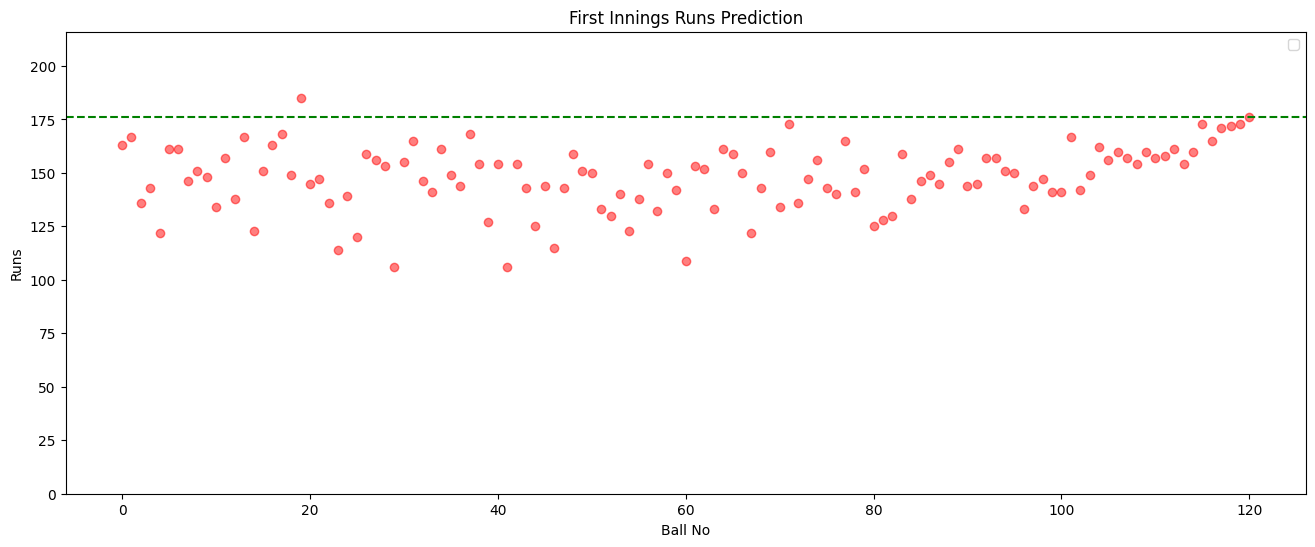

In [40]:
x_val = [i for i in range(len(inng1Pred))]
y_val = inng1Pred

plt.figure(figsize = (16, 6))
plt.scatter(x_val,y_val,color = 'r', alpha = 0.5)
plt.axhline(inng1Actual, ls = '--', color = 'g')
plt.ylim(0,inng1Actual + 40)
plt.title('First Innings Runs Prediction')
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()

In [41]:
inng1_errorRate = np.mean([abs(i - inng1Actual) for i in inng1Pred])

In [42]:
inng1_errorRate

28.165289256198346

In [43]:
inng2Actual = sum(mydf_ing2.total_runs)

In [44]:
curruns = 0
curwkts = 0
curovers = 0.0
target = inng1Actual

inng2Pred = []

for i in range(len(mydf_ing2)):
  curruns += mydf_ing2.total_runs[i]
  curwkts += mydf_ing2.isOut[i]
  curovers = mydf_ing2.ball[i]

  mypred2 = secondInnings(curruns,curwkts,curovers,target)
  inng2Pred.append(mypred2)

In [45]:
inng2Actual

176

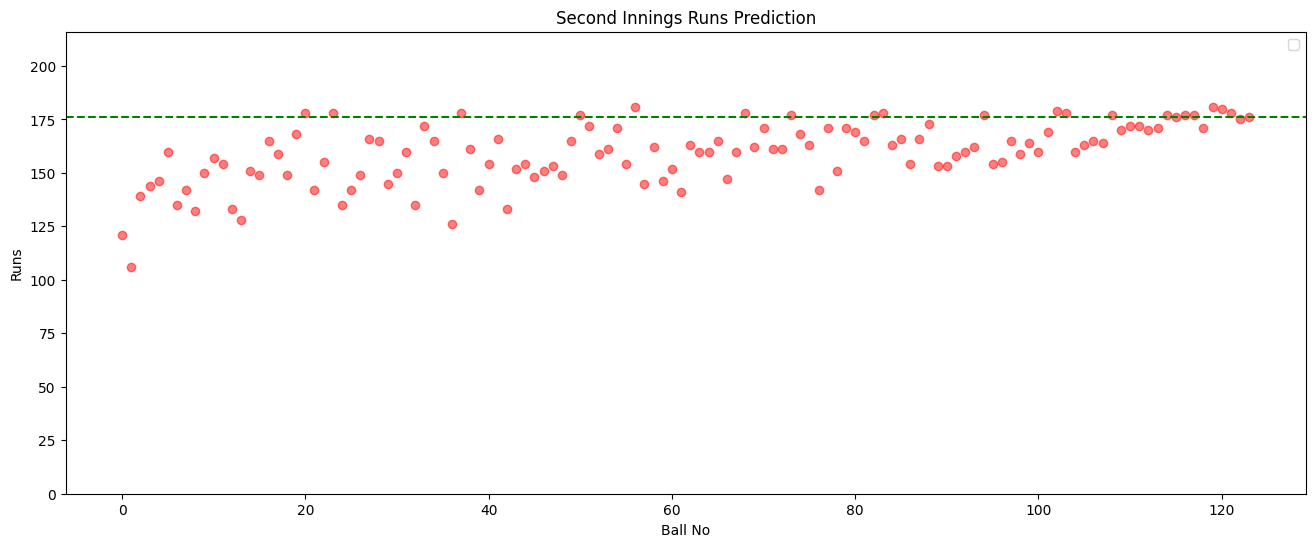

In [46]:
x_val = [i for i in range(len(inng2Pred))]
y_val = inng2Pred

plt.figure(figsize = (16, 6))
plt.scatter(x_val,y_val,color = 'r', alpha = 0.5)
plt.axhline(inng2Actual, ls = '--', color = 'g')
plt.ylim(0,inng2Actual + 40)
plt.title('Second Innings Runs Prediction')
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()

In [47]:
inng2_errorRate = np.mean([abs(i - inng2Actual) for i in inng2Pred])

In [48]:
inng2_errorRate

17.20967741935484

Prediction for each ball - 1st Innings

In [49]:
win_cnt = 0
tie_cnt = 0
lose_cnt = 0

win_cnt_ls = []
tie_cnt_ls = []
lose_cnt_ls = []

ing1_curruns = 0
ing1_curovers = 0.0
ing1_curwkts = 0

for i in range(len(mydf_ing1)):

    ing1_curruns += mydf_ing1.total_runs[i]
    ing1_curovers = mydf_ing1.ball[i]
    ing1_curwkts += mydf_ing1.isOut[i]

    ing2_curruns = 0
    ing2_curwkts = 0
    ing2_curovers = 0.0

    for j in range(100):

        ing1_prediction = firstInnings(ing1_curruns, ing1_curwkts,ing1_curovers)
        target = ing1_prediction

        ing2_prediction = secondInnings(ing2_curruns, ing2_curwkts,ing2_curovers, target)

        if ing2_prediction > target:
            win_cnt += 1
        elif ing2_prediction == target:
            tie_cnt += 1
        else:
            lose_cnt += 1

    win_cnt_ls.append(win_cnt)
    tie_cnt_ls.append(tie_cnt)
    lose_cnt_ls.append(lose_cnt)

    win_cnt = 0
    tie_cnt = 0
    lose_cnt = 0

Prediction for each ball - 2nd Innings

In [50]:
ing2_curruns = 0
ing2_curovers = 0.0
ing2_curwkts = 0
target = inng1Actual

for i in range(len(mydf_ing2)):

    ing2_curruns += mydf_ing2.total_runs[i]
    ing2_curovers = mydf_ing2.ball[i]
    ing2_curwkts += mydf_ing2.isOut[i]

    for j in range(100):

        ing2_prediction = secondInnings(ing2_curruns, ing2_curwkts, ing2_curovers, target)

        if ing2_prediction > target:
            win_cnt += 1
        elif ing2_prediction == target:
            tie_cnt += 1
        else:
            lose_cnt += 1

    win_cnt_ls.append(win_cnt)
    tie_cnt_ls.append(tie_cnt)
    lose_cnt_ls.append(lose_cnt)

    win_cnt = 0
    tie_cnt = 0
    lose_cnt = 0

In [51]:
len(win_cnt_ls),len(tie_cnt_ls),len(lose_cnt_ls)

(245, 245, 245)

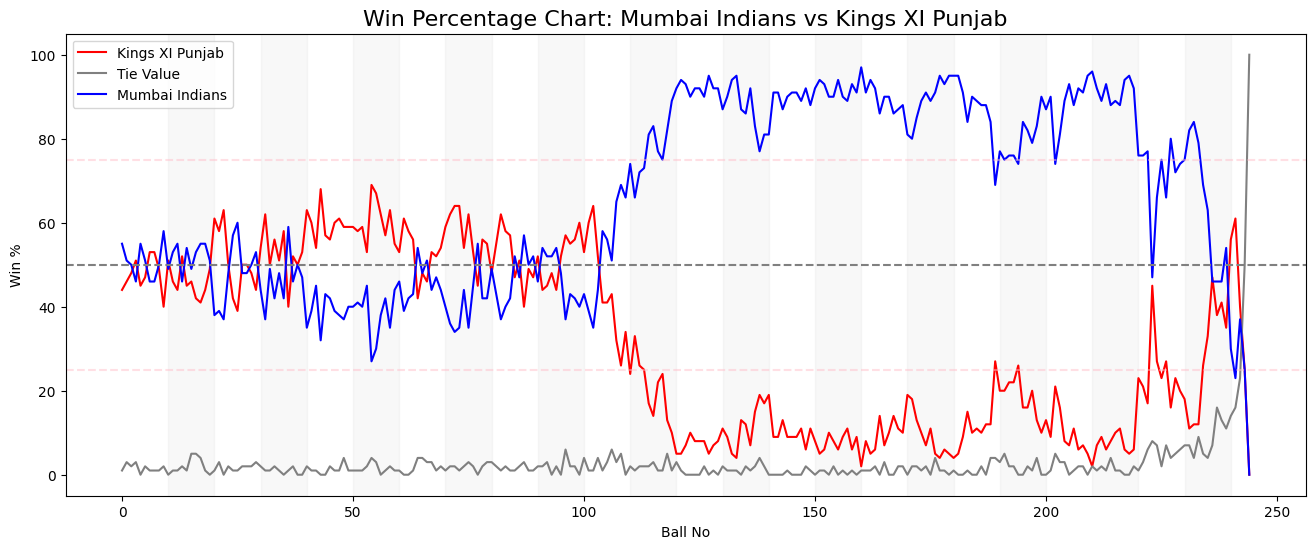

In [52]:
plt.figure(figsize = (16, 6))

x1_values = [i for i in range(len(win_cnt_ls))]
y1_values = win_cnt_ls

x2_values = [i for i in range(len(tie_cnt_ls))]
y2_values = tie_cnt_ls

x3_values = [i for i in range(len(lose_cnt_ls))]
y3_values = lose_cnt_ls

plt.plot(x1_values, y1_values, color = 'red', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.axhline(y = 75, ls = '--', alpha = 0.5, c = 'pink')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.5, c = 'pink')

for i in range(10, len(mydf), 20):
    if i < len(mydf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')

plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()

Conclusion :

The given plot illustrates the winning percentange of both teams in a historical match of IPL from 2020/21 edition between **MI and KXIP**.

The first-ever **double super-over** in a T20 game shows how mumbai was in a perfect win-win situation from the start of 2nd Innings itself, but credits to KLR to pull the winning chances as much as possible since last 10 balls.

#Iteractive ML Model

In [53]:
t1_cum_pb,t2_cum_pb

([0.34047611398464356,
  0.729431040575706,
  0.7884152022360009,
  0.7918206059048415,
  0.9032351334853985,
  0.9527098660327047,
  1.0],
 [0.33107225616178637,
  0.7244996840109543,
  0.7903518011375607,
  0.7938487465767854,
  0.906425110596166,
  0.9515062144512324,
  1.0])

In [54]:
def getprobVal(team):
  if team == "MI":
    p_0 = t1_cum_pb[0]
    p_1 = t1_cum_pb[1]
    p_2 = t1_cum_pb[2]
    p_3 = t1_cum_pb[3]
    p_4 = t1_cum_pb[4]
    p_6 = t1_cum_pb[5]
    p_w = t1_cum_pb[6]

  elif team == "KXIP":
    p_0 = t2_cum_pb[0]
    p_1 = t2_cum_pb[1]
    p_2 = t2_cum_pb[2]
    p_3 = t2_cum_pb[3]
    p_4 = t2_cum_pb[4]
    p_6 = t2_cum_pb[5]
    p_w = t2_cum_pb[6]

  return p_0, p_1, p_2, p_3, p_4, p_6, p_w

In [55]:
getprobVal('MI')

(0.34047611398464356,
 0.729431040575706,
 0.7884152022360009,
 0.7918206059048415,
 0.9032351334853985,
 0.9527098660327047,
 1.0)

In [56]:
def secondInningsPred(curruns,curwkts,curovers,target):

  pred_runs = curruns
  pred_wkts = curwkts
  leftballs = 120 - curovers * 6

  i1p0,i1p1,i1p2,i1p3,i1p4,i1p6,i1pw = getprobVal('MI')
  i2p0,i2p1,i2p2,i2p3,i2p4,i2p6,i2pw = getprobVal('KXIP')

  for i in range(leftballs):
    rnd = np.random.random()

    if rnd <= i2p0:
      pred_runs += 0
    elif rnd <= i2p1:
      pred_runs += 1
    elif rnd <= i2p2:
      pred_runs += 2
    elif rnd <= i2p3:
      pred_runs += 3
    elif rnd <= i2p4:
      pred_runs += 4
    elif rnd <= i2p6:
      pred_runs += 6
    else:
      pred_runs += 0
      pred_wkts += 1

      if (pred_wkts == 10):
          break
    if pred_runs > target:
      break

  return pred_runs

In [57]:
secondInningsPred(0,0,0,176)

147

Winner Function

In [58]:
def match_win(pred_runs,target):
  if pred_runs > target:
    return "WIN"
  elif pred_runs == target:
    return "TIE"
  else:
    return "LOST"

In [59]:
target = 176

curruns = 87
curwkts = 2
curovers = 10

iter_count = 100

runs_ls = []
results_ls = []

win_count = 0
tie_count = 0
lose_count = 0

for i in range(iter_count):
    pred_runs = secondInningsPred(curruns,curwkts,curovers,target)
    runs_ls.append(pred_runs)
    result_pred = match_win(pred_runs, target)
    results_ls.append(result_pred)

    if result_pred == 'WIN':
        win_count += 1
    elif result_pred == 'TIE':
        tie_count += 1
    else:
        lose_count +=1

In [60]:
print(win_count, tie_count, lose_count)

14 3 83


Runs @ required stage

In [61]:
def requiredRuns(curruns, curwkts, curovers, target):

    runslst = []
    resultlst = []
    reqRuns = []
    winlst = []

    for i in range(curruns, target + 1):
        win_count = 0
        tie_count = 0
        lose_count = 0

        for j in range(100):
            pred_runs = secondInningsPred(i,curwkts,curovers,target)
            runslst.append(pred_runs)
            result_pred = match_win(pred_runs, target)
            resultlst.append(result_pred)

            if result_pred == 'WIN':
                win_count += 1
            elif result_pred == 'TIE':
                tie_count += 1
            else:
                lose_count +=1

            winlst.append(win_count)
            reqRuns.append(i)

    required_runs = curruns
    for i in range(len(reqRuns)):
        if winlst[i] >= 51:
            required_runs = reqRuns[i]
            break

    return required_runs


In [62]:
requiredRuns(87,2,10,176)

101

In [63]:
def affordWkts(curruns, curwkts, curovers, target):

  runslst1 = []
  resultlst1 = []
  winlst1 = []
  reqWkts = []

  for i in range(curwkts, 10):
      win_count = 0
      tie_count = 0
      lose_count = 0

      for j in range(100):
          pred_runs = secondInningsPred(curruns,i,curovers,target)
          runslst1.append(pred_runs)
          result_pred = match_win(pred_runs, target)
          resultlst1.append(result_pred)

          if result_pred == 'WIN':
              win_count += 1
          elif result_pred == 'TIE':
              tie_count += 1
          else:
              lose_count +=1

      winlst1.append(win_count)
      reqWkts.append(i)

  req_wicket_value = curwkts

  for k in range(len(reqWkts)):
    if (winlst1[k] <= 50):
      req_wicket_value = reqWkts[k]
      break

  return req_wicket_value

In [64]:
affordWkts(111,5,10,176)

7

In [65]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

def find_runs_wickets(current_wks, at_overs, target_score):
    plt.figure(figsize = (16, 6))
    x = np.array(list(range(21)))
    req_value = requiredRuns(87, curwkts, curovers, target)
    req_wk_value = affordWkts(87, curwkts, curovers, target)

    if at_overs == 10:
        req_value = 87
        req_wk_value = 2

    y = np.array([req_value for i in range(21)])

    plt.scatter(at_overs, req_value, s = 1200, color = 'red')
    plt.axhline(target_score, ls = '--', color = 'blue')
    plt.text( 1, target_score + 10, 'Target Score :' + str(target_score) , color = 'darkblue', fontsize = 13)
    plt.text( at_overs, req_value, str(req_value) + '/' + str(req_wk_value), color = 'white', fontsize = 12,  horizontalalignment='center', verticalalignment='center')
    plt.text(at_overs, req_value - 30, 'KXIP has to be at ' + str(req_value) + '/' +  str(req_wk_value) + ' after ' + str(at_overs) + ' ov', horizontalalignment='center')
    plt.ylim(50, target_score + 50)
    plt.xticks(x)
    plt.title('Where should KXIP be?', fontsize = 20)
    plt.xlabel('Overs')
    plt.ylabel('Score')
    plt.show()

In [66]:
print('current_score = KXIP: 87/2 (10 overs)')
print('')

interactive_plot = interactive(find_runs_wickets, current_wks = widgets.IntSlider(min=2, max=10, step=1, value=1),  at_overs=widgets.IntSlider(min=10, max=20, step=1, value=10), target_score = widgets.IntSlider(min=0, max=250, step=1, value=176))
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

current_score = KXIP: 87/2 (10 overs)



interactive(children=(IntSlider(value=2, description='current_wks', max=10, min=2), IntSlider(value=10, descri…